In [1]:

from  IPython.display  import display, Image
from IPython.core.display import HTML 
Image(url= "https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/logoAnalytics.png")



In [0]:
# Download datasets.

import os.path

# If datasets already exist do nothing. 

if not os.path.exists('birds.zip'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip
    
if not os.path.exists('birds_f_numbers.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_f_numbers.txt
    
if not os.path.exists('birds_training_pairs.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_training_pairs.txt


In [0]:
import os 
import zipfile

# Extract images zip file
with zipfile.ZipFile("birds.zip","r") as zip_ref:
    zip_ref.extractall(os.getcwd())

In [4]:
! ls

birds			  birds.zip			      datalab
birds_f_numbers.txt	  bottleneck_features_train.npy       datasets
birds_training_pairs.txt  bottleneck_features_validation.npy


In [5]:
! ls birds/egret/

egr001.jpg  egr018.jpg	egr035.jpg  egr052.jpg	egr069.jpg  egr086.jpg
egr002.jpg  egr019.jpg	egr036.jpg  egr053.jpg	egr070.jpg  egr087.jpg
egr003.jpg  egr020.jpg	egr037.jpg  egr054.jpg	egr071.jpg  egr088.jpg
egr004.jpg  egr021.jpg	egr038.jpg  egr055.jpg	egr072.jpg  egr089.jpg
egr005.jpg  egr022.jpg	egr039.jpg  egr056.jpg	egr073.jpg  egr090.jpg
egr006.jpg  egr023.jpg	egr040.jpg  egr057.jpg	egr074.jpg  egr091.jpg
egr007.jpg  egr024.jpg	egr041.jpg  egr058.jpg	egr075.jpg  egr092.jpg
egr008.jpg  egr025.jpg	egr042.jpg  egr059.jpg	egr076.jpg  egr093.jpg
egr009.jpg  egr026.jpg	egr043.jpg  egr060.jpg	egr077.jpg  egr094.jpg
egr010.jpg  egr027.jpg	egr044.jpg  egr061.jpg	egr078.jpg  egr095.jpg
egr011.jpg  egr028.jpg	egr045.jpg  egr062.jpg	egr079.jpg  egr096.jpg
egr012.jpg  egr029.jpg	egr046.jpg  egr063.jpg	egr080.jpg  egr097.jpg
egr013.jpg  egr030.jpg	egr047.jpg  egr064.jpg	egr081.jpg  egr098.jpg
egr014.jpg  egr031.jpg	egr048.jpg  egr065.jpg	egr082.jpg  egr099.jpg
egr015.jpg  egr032.jpg	egr049.jpg 

Using TensorFlow backend.


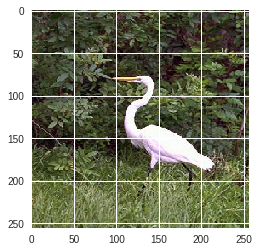

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('birds/egret/egr013.jpg',grayscale=False,target_size=(256,256),interpolation='nearest') 
x= img_to_array(img)
plt.imshow(x/255)


In [0]:
import random

randomList= random.sample(range(1,101),100)

formating = "{:03d}".format

formatedList = [formating(item) for item in randomList]

In [0]:
# Resize images to 256X256
from PIL import Image

basewidth = 224
hsize = 224

paths=['egret','mandarin','owl','puffin','toucan','wood_duck']

for j in paths[:]:
    if(j=='egret'):
        pre='/egr'
    elif(j=='mandarin'):
        pre='/man'
    elif(j=='owl'):
        pre='/owl'
    elif(j=='puffin'):
        pre='/puf'
    elif(j=='wood_duck'):
        pre='/wod'
    elif(j=='toucan'):
        pre='/tou'
        
    
    for i in formatedList[:]:
        img = Image.open('birds/'+j+pre+i+'.jpg')
        wpercent = (basewidth/float(img.size[0]))
        img = img.resize((basewidth,hsize), Image.ANTIALIAS)
        img.save('birds/'+j+pre+i+'.jpg')

In [0]:
# Delete pre existing files.
! rm -r datasets/

In [0]:
#@title
from shutil import copy
counter = 0

if not os.path.exists('datasets/train/'):
  os.makedirs('datasets/train/egr')
  os.makedirs('datasets/train/man')
  os.makedirs('datasets/train/tou')
  os.makedirs('datasets/train/owl')
  os.makedirs('datasets/train/puf')
  os.makedirs('datasets/train/wod')
  
if not os.path.exists('datasets/test/'):
  os.makedirs('datasets/test/egr')
  os.makedirs('datasets/test/man')
  os.makedirs('datasets/test/tou')
  os.makedirs('datasets/test/owl')
  os.makedirs('datasets/test/puf')
  os.makedirs('datasets/test/wod')
    
for i in formatedList[:]:
  if counter < 50:
    copy('birds/egret/egr'+i+'.jpg','datasets/train/egr/egr'+i+'.jpg')
    copy('birds/mandarin/man'+i+'.jpg','datasets/train/man/man'+i+'.jpg')
    copy('birds/toucan/tou'+i+'.jpg','datasets/train/tou/tou'+i+'.jpg')
    copy('birds/owl/owl'+i+'.jpg','datasets/train/owl/owl'+i+'.jpg')
    copy('birds/puffin/puf'+i+'.jpg','datasets/train/puf/puf'+i+'.jpg')
    copy('birds/wood_duck/wod'+i+'.jpg','datasets/train/wod/wod'+i+'.jpg')
  else: 
      copy('birds/egret/egr'+i+'.jpg','datasets/test/egr/egr'+i+'.jpg')
      copy('birds/mandarin/man'+i+'.jpg','datasets/test/man/man'+i+'.jpg')
      copy('birds/toucan/tou'+i+'.jpg','datasets/test/tou/tou'+i+'.jpg')
      copy('birds/owl/owl'+i+'.jpg','datasets/test/owl/owl'+i+'.jpg')
      copy('birds/puffin/puf'+i+'.jpg','datasets/test/puf/puf'+i+'.jpg')
      copy('birds/wood_duck/wod'+i+'.jpg','datasets/test/wod/wod'+i+'.jpg')
      
  counter=counter+1

In [26]:
# Data path information.
trainDataPath= 'datasets/train'
testDataPath= 'datasets/test'

# Images dimensions.
widthSize =  256
heightSize = 256

# Batch Size.

batchSize = 16

In [106]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

outputClasses = 6

if K.image_data_format() == 'channels_first':
    input_shape = (3, widthSize, heightSize)
else:
    input_shape = (widthSize, heightSize, 3)

model = Sequential()
NumN=32
NumN2=64

model.add(Conv2D(NumN, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(NumN, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(NumN2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(NumN2))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(outputClasses))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_84 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_85 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [107]:
# Compile the convolutional neural network
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import adamax
from keras.optimizers import rmsprop
model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
              metrics=['accuracy'])

In [108]:
# this is the augmentation configuration we will use for training
trainData = ImageDataGenerator(rescale=1. / 255)

# this is the augmentation configuration we will use for testing:
# only rescaling
testData = ImageDataGenerator(rescale=1. / 255)

trainGenerator = trainData.flow_from_directory(
    trainDataPath,
    target_size=(widthSize, widthSize),
    batch_size=batchSize,
    classes=['egr','man','owl','puf','tou','wod'])

testGenerator = trainData.flow_from_directory(
    testDataPath,
    target_size=(widthSize, widthSize),
    batch_size=batchSize, 
    classes=['egr','man','owl','puf','tou','wod'])

Found 300 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [109]:
epochs = 30
totalTrainSamples=300
totalTestSamples= 300

model.fit_generator(
    trainGenerator,
    steps_per_epoch=totalTrainSamples // batchSize,
    epochs=epochs)

Epoch 1/30
18/18 [==============================] - 2s 126ms/step - loss: 1.8914 - acc: 0.2001
Epoch 2/30
18/18 [==============================] - 1s 70ms/step - loss: 1.7463 - acc: 0.2708
Epoch 3/30
18/18 [==============================] - 1s 69ms/step - loss: 1.6430 - acc: 0.3450
Epoch 4/30
18/18 [==============================] - 1s 69ms/step - loss: 1.4968 - acc: 0.4040
Epoch 5/30
18/18 [==============================] - 1s 71ms/step - loss: 1.2930 - acc: 0.4629
Epoch 6/30
18/18 [==============================] - 1s 71ms/step - loss: 1.2640 - acc: 0.5208
Epoch 7/30
18/18 [==============================] - 1s 69ms/step - loss: 1.1364 - acc: 0.5498
Epoch 8/30
18/18 [==============================] - 1s 70ms/step - loss: 1.0202 - acc: 0.6389
Epoch 9/30
18/18 [==============================] - 1s 67ms/step - loss: 0.9261 - acc: 0.6319
Epoch 10/30
18/18 [==============================] - 1s 68ms/step - loss: 0.8793 - acc: 0.6746
Epoch 11/30
 1/18 [>.............................] - ETA: 

18/18 [==============================] - 1s 70ms/step - loss: 0.8507 - acc: 0.6562
Epoch 12/30
18/18 [==============================] - 1s 69ms/step - loss: 0.8966 - acc: 0.6341
Epoch 13/30
18/18 [==============================] - 1s 70ms/step - loss: 0.7482 - acc: 0.7222
Epoch 14/30
18/18 [==============================] - 1s 69ms/step - loss: 0.7103 - acc: 0.7432
Epoch 15/30
18/18 [==============================] - 1s 67ms/step - loss: 0.7309 - acc: 0.7696
Epoch 16/30
18/18 [==============================] - 1s 70ms/step - loss: 0.6370 - acc: 0.7674
Epoch 17/30
18/18 [==============================] - 1s 69ms/step - loss: 0.5558 - acc: 0.8125
Epoch 18/30
18/18 [==============================] - 1s 69ms/step - loss: 0.5688 - acc: 0.7824
Epoch 19/30
18/18 [==============================] - 1s 69ms/step - loss: 0.6492 - acc: 0.7732
Epoch 20/30
18/18 [==============================] - 1s 69ms/step - loss: 0.5419 - acc: 0.8195
Epoch 21/30
 3/18 [====>.........................] - ETA: 1s -

18/18 [==============================] - 1s 70ms/step - loss: 0.4966 - acc: 0.8495
Epoch 22/30
18/18 [==============================] - 1s 69ms/step - loss: 0.4795 - acc: 0.8113
Epoch 23/30
18/18 [==============================] - 1s 68ms/step - loss: 0.4775 - acc: 0.8414
Epoch 24/30
18/18 [==============================] - 1s 70ms/step - loss: 0.4450 - acc: 0.8472
Epoch 25/30
18/18 [==============================] - 1s 68ms/step - loss: 0.3890 - acc: 0.8761
Epoch 26/30
18/18 [==============================] - 1s 70ms/step - loss: 0.3965 - acc: 0.8715
Epoch 27/30
18/18 [==============================] - 1s 69ms/step - loss: 0.3990 - acc: 0.8820
Epoch 28/30
18/18 [==============================] - 1s 69ms/step - loss: 0.3668 - acc: 0.8889
Epoch 29/30
18/18 [==============================] - 1s 70ms/step - loss: 0.3539 - acc: 0.8853
Epoch 30/30
18/18 [==============================] - 1s 68ms/step - loss: 0.3156 - acc: 0.9063


In [110]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

target_names = ['egr','man','owl','puf','tou','wod']

Y_pred = model.predict_generator(testGenerator, totalTestSamples // batchSize+1)
y_pred = np.argmax(Y_pred, axis=1)
print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(testGenerator.classes, y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------')
print('---------------Classification Report-------------')

print(classification_report(testGenerator.classes, y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr   13    2    6    8   10   11
man   13    4   12    5    5   11
owl   11    7   10    3   12    7
puf   11    6    6    7    8   12
tou   17    4    3    6   10   10
wod   10    4    8   10    8   10
-------------------------------------------------
-------------------------------------------------
---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.17      0.26      0.21        50
        man       0.15      0.08      0.10        50
        owl       0.22      0.20      0.21        50
        puf       0.18      0.14      0.16        50
        tou       0.19      0.20      0.19        50
        wod       0.16      0.20      0.18        50

avg / total       0.18      0.18      0.18       300



In [111]:
for x_batch, y_batch in testGenerator:
    print(y_batch)
    yPred = model.predict_classes(x_batch)
    print(model.predict(x_batch).round(1))
    print('The accuracy over the test set is: ', (yPred==y_batch[:,0]).mean())
    break

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
[[0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.9 0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.7 0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.6 0. ]
 [0.1 0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.3 0.  0.2 0.  0.  0.1]
 [0.  0.  0.  0.  1.  0. ]
 [0.  0.9 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.4 0.  0.8 0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0. ]]
The accuracy over the test set is:  0.125


In [0]:
#Confution Matrix and Classification Report


#Y_pred = model.predict_generator(x_batch, num_of_test_samples // batch_size+1)
#y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(test_generator.classes, y_pred))
#print('Classification Report')
#target_names = ['Cats', 'Dogs', 'Horse']
#print(classification_report(test.classes, y_pred, target_names=target_names))

In [81]:
from keras import applications

#top_model_weights_path = 'bottleneck_fc_model.h5'

if K.image_data_format() == 'channels_first':
    input_shape = (3, widthSize, heightSize)
else:
    input_shape = (widthSize, heightSize, 3)

# Call and build mobileNet. Include_top=True because we want to predict using the same classes as in imagenet.
model = applications.MobileNet(include_top=True, weights='imagenet'
                               , input_shape=input_shape)

trainGenerator = trainData.flow_from_directory(
    trainDataPath,
    target_size=(widthSize, widthSize),
    batch_size=batchSize,
    classes=None)

testGenerator = trainData.flow_from_directory(
    testDataPath,
    target_size=(widthSize, widthSize),
    batch_size=batchSize, 
    classes=None,
    shuffle=True)

trainProbPredictor = model.predict_generator(
    trainGenerator, totalTrainSamples // batchSize+1)

#np.save('bottleneck_features_train.npy', bottleneck_features_train)

testProbPredictor = model.predict_generator(
    testGenerator, totalTestSamples // batchSize+1)
#np.save('bottleneck_features_validation.npy', bottleneck_features_validation)

Found 300 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [62]:
#print(testProbPredictor)
testClassesPredictor = np.argmax(testPredictor, axis=1)
#testClassesPredictor

unique, counts = np.unique(testClassesPredictor, return_counts=True)

predFrequencies =pd.DataFrame( np.asarray((unique, counts)).T,columns=['class','count'])

sortDataFrame = predFrequencies.sort_values(by='count',ascending=False)

topClasses=sortDataFrame.iloc[:10,:]

topClasses


,class,count
15,97,65
14,96,48
23,132,47
8,81,19
27,146,15
4,21,7
3,20,6
16,98,5
12,87,5
32,299,5


In [78]:
testPredictorDataFrame = pd.DataFrame(testPredictor)
testPredictorDataFrame

topIndex=topClasses.as_matrix()[:,0]

topIndex

finalPred = round(testPredictorDataFrame.iloc[:,topIndex],4)

finalPred

,97,96,132,81,146,21,20,98,87,299
0,0.0005,0.9265,0.0001,0.0002,0.0033,0.0010,0.0000,0.0000,0.0000,0.0000
1,0.0014,0.0003,0.0015,0.0429,0.5818,0.0057,0.0867,0.0007,0.0000,0.0002
2,0.4675,0.0007,0.0002,0.0000,0.0132,0.0002,0.0010,0.0162,0.0008,0.0000
3,0.0000,0.0000,0.0000,0.5174,0.0009,0.0009,0.0014,0.0000,0.3376,0.0035
4,0.0012,0.0057,0.0406,0.0081,0.0073,0.0017,0.0009,0.0024,0.0146,0.0013
5,0.0225,0.0001,0.0243,0.0002,0.0034,0.0001,0.0873,0.1493,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0018,0.0000,0.0000,0.0001,0.0000,0.0001,0.7228
7,0.8295,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0222,0.0000,0.0000
8,0.0675,0.0008,0.0005,0.0009,0.0306,0.0038,0.0000,0.0039,0.0001,0.0000
9,0.0002,0.0000,0.0003,0.8170,0.0089,0.0107,0.0003,0.0002,0.0029,0.0008


In [91]:
testGenerator = trainData.flow_from_directory(
    testDataPath,
    target_size=(widthSize, widthSize),
    batch_size=totalTestSamples, 
    classes=None,
    shuffle=True)

for x_batch, y_batch in testGenerator:
  print(y_batch)
  break

Found 300 images belonging to 6 classes.
[[0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [24]:

target_names = ['egr','man','owl','puf','tou','wod']

y_pred = np.argmax(bottleneck_features_validation, axis=1)
print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(testGenerator.classes, bottleneck_features_validation)))
print('-------------------------------------------------')
print('-------------------------------------------------')
print('---------------Classification Report-------------')


print(classification_report(testGenerator.classes, y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------


ValueError: ignored

In [93]:
testGenerator

In [26]:
epochs = 30
totalTrainSamples=300
totalTestSamples= 300

model.fit_generator(
    trainGenerator,
    steps_per_epoch=totalTrainSamples // batchSize,
    epochs=epochs)

RuntimeError: ignored